<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/Hands_on_machine_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Text(0, 0.5, 'Y')

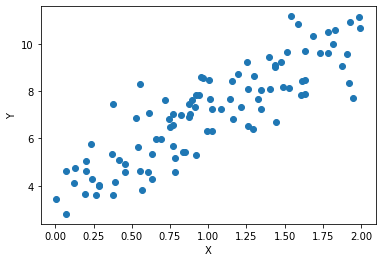

In [ ]:
#generating some linear looking data :
x = 2*np.random.rand(100,1)
y = 4 + 3*x +np.random.randn(100,1)
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")

#Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.coef_,lin_reg.intercept_

(array([[2.96346198]]), array([4.05726139]))

#StochasticGradient descent

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000,tol= 1e-3,penalty = None,eta0 =0.1)
sgd_reg.fit(x,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([4.03510707]), array([2.93632386]))

#Polynomial Regression

Text(0, 0.5, 'Y')

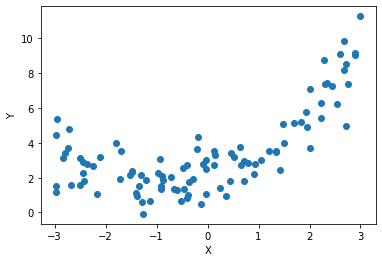

In [ ]:
#creating a polynomial dataset 
m = 100
x_poly = 6* np.random.rand(m,1) - 3
y_poly = 0.5*x_poly**2+x_poly+2 +np.random.randn(m,1)
plt.scatter(x_poly,y_poly)
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
#creating the model and fitting it 
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_feat.fit_transform(x_poly)
X_poly[:2]

array([[ 0.12212431,  0.01491435],
       [-2.93464867,  8.61216283]])

now we can use this x features to fit into a multiple linear regression



In [ ]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X_poly,y_poly)
lin_reg1.intercept_,lin_reg.coef_

(array([1.88669584]), array([[0.95336387, 0.535294  ]]))

In [ ]:
y_preds = lin_reg1.predict(X_poly)

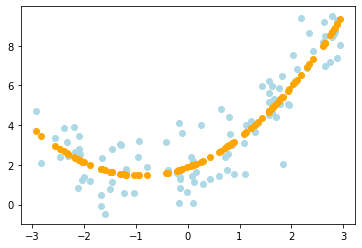

In [ ]:
plt.scatter(x_poly,y_poly,color = "lightblue")
plt.scatter(x_poly,y_preds,color = "orange")

#Learning curves

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
np.random.seed(42)
#funtion to plot the learning curves :
def plot_learning_curves(model,x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
  train_errors,val_errors=[],[]
  for m in range(1,len(x_train)):
    model.fit(x_train[:m],y_train[:m])
    y_train_pred = model.predict(x_train[:m])
    y_val_pred = model.predict(x_test)
    train_errors.append(mean_squared_error(y_train[:m],y_train_pred))
    val_errors.append(mean_squared_error(y_test,y_val_pred))
  plt.plot(np.sqrt(train_errors),color = "red",linewidth=2)
  plt.plot(np.sqrt(val_errors),color = "blue",linewidth=2)


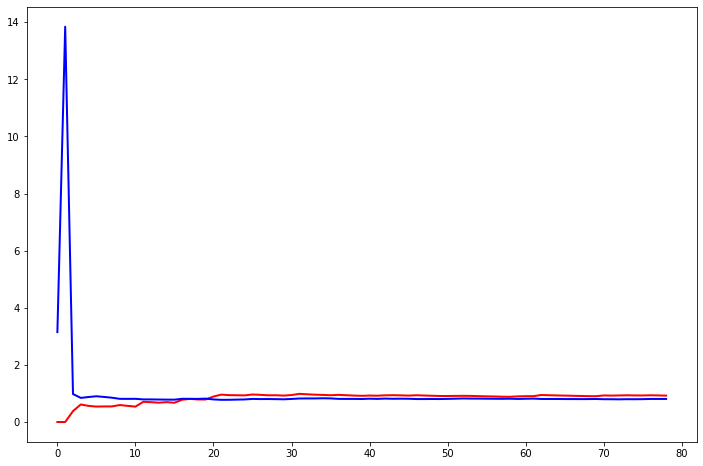

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)
plt.figure(figsize=(12,8))
plot_learning_curves(lin_reg,x,y)

#Regularized Linear models

Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 1, solver='cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])


array([[8.66589805]])

Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([8.54954777])

In [ ]:
from sklearn.linear_model import ElasticNet
el_net_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
el_net_reg.fit(x,y)
el_net_reg.predict([[1.5]])

array([8.40724033])

#testing